# Best validation AUC variation over the generations

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import os

In [ ]:
def readCSV(file, columns_to_read):
  rows = []
  firstLine = True
  with open(file, 'r') as file:
      for line in file:
          if firstLine:
            firstLine = False
            continue
          row = []
          in_quotes = False
          field = ''
          for ch in line.strip():
              if ch == '"':
                  in_quotes = not in_quotes
                  continue
              if ch == ',' and not in_quotes:
                  row.append(field)
                  field = ''
              else:
                  field += ch
          row.append(field)
          rows.append(row)

  df = pd.DataFrame(rows, columns=columns_to_read)
  return df

In [ ]:
parent_folder_path = "/content/gdrive/MyDrive/sync/results"

# Get a list of folder names in the parent folder
folder_names = os.listdir(parent_folder_path)

AUC_df_array = []

for folder_name in folder_names:
    folder_path = f'{parent_folder_path}/{folder_name}'

    # Get a list of file names in the folder
    file_names = os.listdir(folder_path)
    # print(file_names)

    train_df = []
    val_df = []
    best_df = []
    AUC_df = pd.DataFrame(columns= range(25))

    columns_to_read = ["Generation",	"FPR",	"1 - TPR",	"1 - AUC",	"F1",	"BA",	"MCC",	"Accuracy",	"TP",	"FP",	"TN",	"FN", "Phenotype"]

    count = 0
    for file_name in file_names:
        print(file_name)
        data_df_1 = []
        data_df_2 = []
        best_individuals = []
        columns = ["Generation",	"FPR",	"1 - TPR",	"1 - AUC",	"F1",	"BA",	"MCC",	"Accuracy",	"TP",	"FP",	"TN",	"FN", "Phenotype", "Distance", "Fold"]
        best_individuals = pd.DataFrame(columns=columns)
        for fold in range(5):
            df1 = readCSV(f'{folder_path}/{file_name}/best_train_indvidual_{fold+1}.csv', columns_to_read)
            df1["FPR"] = df1["FPR"].astype(float)
            df1["1 - TPR"] = df1["1 - TPR"].astype(float)
            df1["1 - AUC"] = df1["1 - AUC"].astype(float)
            df1["Distance"] = df1["FPR"]**2 + df1["1 - TPR"]**2 + df1["1 - AUC"]**2
            df1["Fold"] = fold

            df2 = readCSV(f'{folder_path}/{file_name}/best_val_indvidual_{fold+1}.csv', columns_to_read)
            df2["FPR"] = df2["FPR"].astype(float)
            df2["1 - TPR"] = df2["1 - TPR"].astype(float)
            df2["1 - AUC"] = df2["1 - AUC"].astype(float)
            df2["Distance"] = df2["FPR"]**2 + df2["1 - TPR"]**2 + df2["1 - AUC"]**2
            df2["Fold"] = fold

            data_df_1.append(df1)
            data_df_2.append(df2)
        for generation in range(len(data_df_1[0])):
            best_individuals.loc[generation] = data_df_2[0].loc[generation]
            for fold in range(5):
                if best_individuals.loc[generation, "Distance"] > data_df_2[fold].loc[generation, "Distance"]:
                    best_individuals.loc[generation] = data_df_2[fold].loc[generation]
        train_df.append(data_df_1)
        val_df.append(data_df_2)
        best_df.append(best_individuals)
        AUC_df[count] = 1 - best_individuals['1 - AUC']
        count = count + 1
    AUC_df_array.append(AUC_df)



cc_cm_p1000_g100_s10
cc_cm_p1000_g100_s100
cc_cm_p1000_g100_s1000
cc_cm_p1000_g100_s10000
cc_cm_p1000_g100_s10100
cc_cm_p1000_g100_s10300
cc_cm_p1000_g100_s11100
cc_cm_p1000_g100_s18571
cc_cm_p1000_g100_s4880
cc_cm_p1000_g100_s55600
cc_cm_p1000_g100_s558
cc_cm_p1000_g100_s583
cc_cm_p1000_g100_s6785
cc_cm_p1000_g100_s872
cc_cm_p1000_g100_s88350
cc_cm_p1000_g100_s1234
cc_cm_p1000_g100_s13248
cc_cm_p1000_g100_s2516
cc_cm_p1000_g100_s3310
cc_cm_p1000_g100_s4316
cc_cm_p1000_g100_s49873
cc_cm_p1000_g100_s654832
cc_cm_p1000_g100_s76428
cc_cm_p1000_g100_s94652
cc_cm_p1000_g100_s9534
cc_dm_p1000_g100_s10
cc_dm_p1000_g100_s100
cc_dm_p1000_g100_s1000
cc_dm_p1000_g100_s10000
cc_dm_p1000_g100_s10100
cc_dm_p1000_g100_s10300
cc_dm_p1000_g100_s11100
cc_dm_p1000_g100_s18571
cc_dm_p1000_g100_s4880
cc_dm_p1000_g100_s55600
cc_dm_p1000_g100_s558
cc_dm_p1000_g100_s583
cc_dm_p1000_g100_s6785
cc_dm_p1000_g100_s872
cc_dm_p1000_g100_s88350
cc_dm_p1000_g100_s1234
cc_dm_p1000_g100_s13248
cc_dm_p1000_g100_s2516
cc

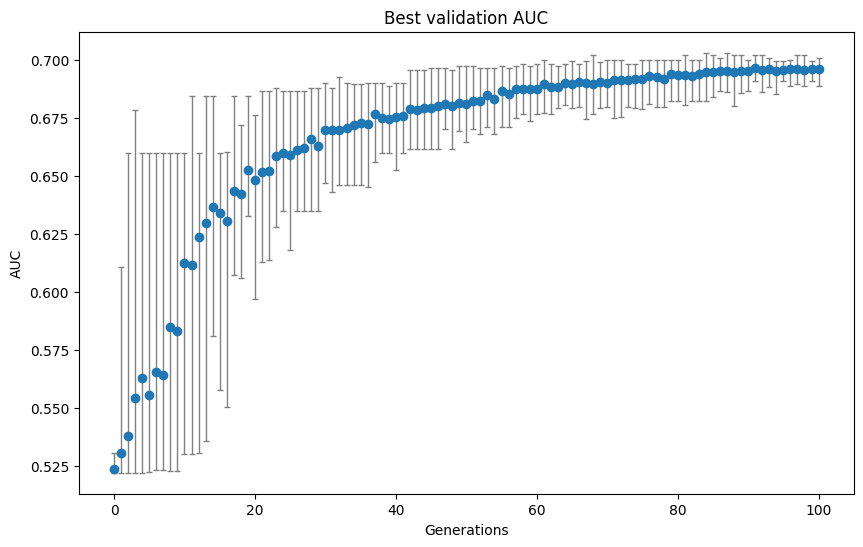

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
iterations = np.arange(len(AUC_df))
min_values = AUC_df.min(axis = 1)
max_values = AUC_df.max(axis = 1)
mean_values = AUC_df.mean(axis = 1)
error_values = [mean_values - min_values, max_values - mean_values] # [lower error, upper error]

# Plotting
plt.figure(figsize=(10, 6))

plt.errorbar(iterations, mean_values, yerr=error_values, fmt='o', ecolor='gray', elinewidth=1, capsize=2)

plt.xlabel('Generations')
plt.ylabel('AUC')
plt.title('Best validation AUC')
plt.show()


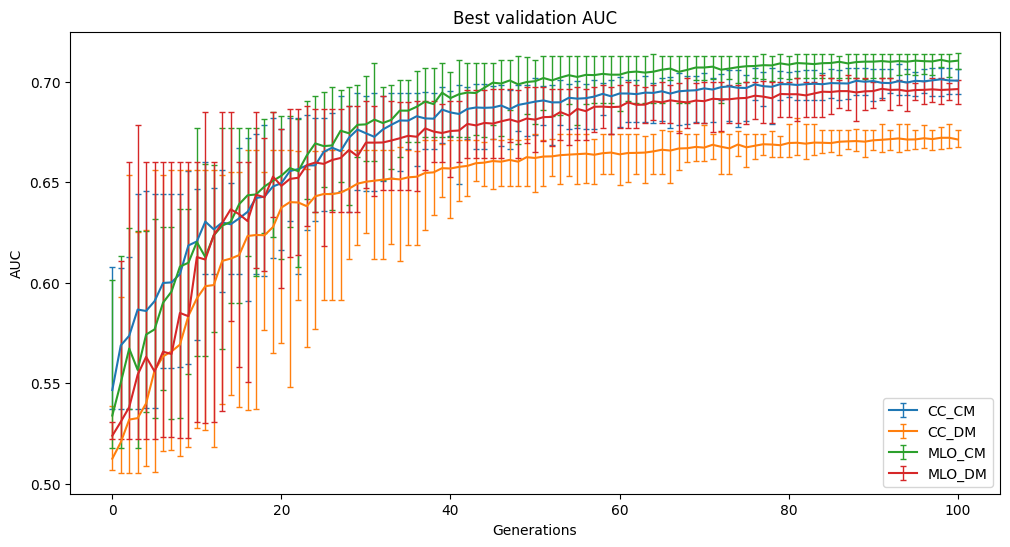

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data for four datasets
iterations = np.arange(101)
datasets = {
    "CC_CM": [AUC_df_array[0].min(axis = 1), AUC_df_array[0].max(axis = 1), AUC_df_array[0].mean(axis = 1)],
    "CC_DM": [AUC_df_array[1].min(axis = 1), AUC_df_array[1].max(axis = 1), AUC_df_array[1].mean(axis = 1)],
    "MLO_CM": [AUC_df_array[2].min(axis = 1), AUC_df_array[2].max(axis = 1), AUC_df_array[2].mean(axis = 1)],
    "MLO_DM": [AUC_df_array[3].min(axis = 1), AUC_df_array[3].max(axis = 1), AUC_df_array[3].mean(axis = 1)]
}

plt.figure(figsize=(12, 6))

for label, (min_values, max_values, mean_values) in datasets.items():
    error_values = [mean_values - min_values, max_values - mean_values]  # [lower error, upper error]

    plt.errorbar(iterations, mean_values, yerr=error_values, label=label, elinewidth=1, capsize=2)

plt.xlabel('Generations')
plt.ylabel('AUC')
plt.title('Best validation AUC')
plt.legend(loc='lower right')
plt.show()
